## XOR Classification Using a Neural Network from Scratch

This notebook implements a simple 2-layer neural network using NumPy to classify the XOR logic gate.

### Key Concepts:
- Forward Propagation
- Backpropagation
- Loss Minimization (Binary Cross-Entropy)
- Manual Weight Updates (Gradient Descent)
- Decision Boundary Visualization


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# XOR Input and Output
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [8]:
# Seed for reproducibility
np.random.seed(42)

# Define architecture
input_size = 2
hidden_size = 2
output_size = 1

# Initialize weights and biases
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))

W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Learning rate
lr = 0.1

In [10]:
# Track loss
losses = []

for epoch in range(10000):
    # FORWARD PASS
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)

    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    # LOSS (Binary Cross-Entropy)
    loss = np.mean((y - a2) ** 2)
    losses.append(loss)

    # BACKWARD PASS
    error_output = a2 - y
    d_output = error_output * sigmoid_derivative(a2)

    error_hidden = d_output.dot(W2.T)
    d_hidden = error_hidden * sigmoid_derivative(a1)

    # Update weights and biases
    W2 -= a1.T.dot(d_output) * lr
    b2 -= np.sum(d_output, axis=0, keepdims=True) * lr

    W1 -= X.T.dot(d_hidden) * lr
    b1 -= np.sum(d_hidden, axis=0, keepdims=True) * lr

    # Print loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

Epoch 0, Loss: 0.2558
Epoch 1000, Loss: 0.2494
Epoch 2000, Loss: 0.2454
Epoch 3000, Loss: 0.2047
Epoch 4000, Loss: 0.1532
Epoch 5000, Loss: 0.1387
Epoch 6000, Loss: 0.1336
Epoch 7000, Loss: 0.1312
Epoch 8000, Loss: 0.1297
Epoch 9000, Loss: 0.1288


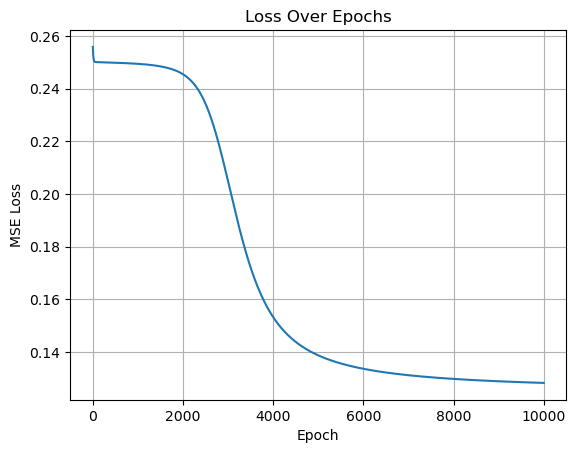

In [12]:
plt.plot(losses)
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

In [14]:
print("Predictions:")
print(np.round(a2))

print("\nActual:")
print(y)

Predictions:
[[0.]
 [0.]
 [1.]
 [1.]]

Actual:
[[0]
 [1]
 [1]
 [0]]


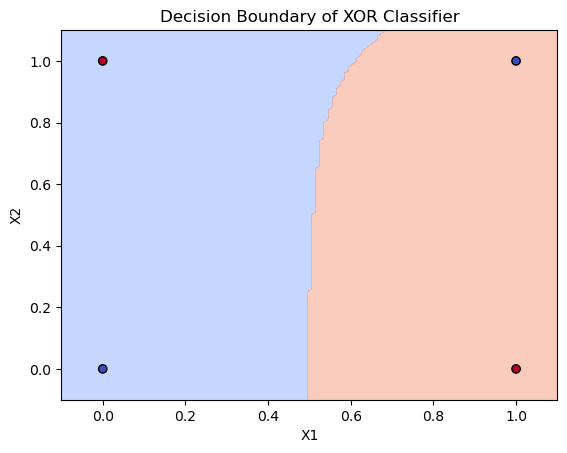

In [16]:
def plot_decision_boundary(X, y, model_func):
    h = 0.01
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z1 = sigmoid(np.dot(grid, W1) + b1)
    Z2 = sigmoid(np.dot(Z1, W2) + b2)
    preds = Z2.reshape(xx.shape)

    plt.contourf(xx, yy, preds > 0.5, alpha=0.5, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y[:, 0], edgecolors='k', cmap='coolwarm')
    plt.title("Decision Boundary of XOR Classifier")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()

plot_decision_boundary(X, y, None)

### Conclusion

- Successfully implemented a basic neural network from scratch.
- The network learned to classify XOR, a non-linearly separable problem.
- Understood the core flow of forward and backward propagation.
- Visualized how weights evolved to form a correct decision boundary.
